An Qi Ma

## The Relationship Between Earthquakes and Tsunamis

In this part of the project, I took a dataset of recent earthquakes provided by the USGS database which represents earthquakes that happened from the world starting from February. The tsunami dataset contains a list of observations of tsunamis that have occured throughout history and comes from the NOAA website that contains many types of information related to tsunamis. I will be analyzing how earthquakes and tsunamis are related what how big of earthquakes usually cause tsunamis.

In [61]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [62]:
plt.style.use('ggplot')

In [63]:
# earthquakes dataframe
earthquakes = pd.read_csv('world_eq.csv')
earthquakes.head(10)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,1/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,1/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,1/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,1/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,1/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


In [64]:
len(earthquakes.index)

23412

In [65]:
earthquakes = earthquakes[["Date", "Time", "Latitude","Longitude","Magnitude", "Depth"]]
earthquakes.head()

,Date,Time,Latitude,Longitude,Magnitude,Depth
0,1/2/1965,13:44:18,19.246,145.616,6.0,131.6
1,1/4/1965,11:29:49,1.863,127.352,5.8,80.0
2,1/5/1965,18:05:58,-20.579,-173.972,6.2,20.0
3,1/8/1965,18:49:43,-59.076,-23.557,5.8,15.0
4,1/9/1965,13:32:50,11.938,126.427,5.8,15.0


In [66]:
# tsunamis dataframe
tsunamis = pd.read_excel('tsevent.xlsx')
tsunamis.head()

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
0,1,-2000,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
1,3,-1610,NaN,NaN,NaN,NaN,NaN,4.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
2,4,-1365,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,5,-1300,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,-760,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

In [68]:
for i in range(0, len(tsunamis.columns.values)):
    tsunamis.columns.values[i] = str(tsunamis.columns.values[i])

In [69]:
# delete unnecessary columns
tsunamis.drop(tsunamis.columns[[range(16,46)]], inplace = True, axis = 1)
tsunamis.head()

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
0,1,-2000,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,SYRIA,NaN,SYRIAN COASTS,35.683,35.80
1,3,-1610,NaN,NaN,NaN,NaN,NaN,4.0,6.0,NaN,NaN,GREECE,NaN,THERA ISLAND (SANTORINI),36.400,25.40
2,4,-1365,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,SYRIA,NaN,SYRIAN COASTS,35.683,35.80
3,5,-1300,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,6.0,TURKEY,NaN,"IONIAN COASTS, TROAD",39.960,26.24
4,6,-760,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,ISRAEL,NaN,ISRAEL AND LEBANON COASTS,NaN,NaN


I felt that some of these variables in the tsunami datasets, with most of them being the number of destructions, injured, and damages were unnecessary in this part of the project so I deleted those variables from the dataset.

In [70]:
# Drop N/A lon/lat values for tsunami
# I filtered with longitude because if longitude has N/A, corresponding latitude also has it
tsu = tsunamis.loc[np.isnan(tsunamis['LONGITUDE']) == False]
tsu

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
0,1,-2000,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,SYRIA,NaN,SYRIAN COASTS,35.683,35.800
1,3,-1610,NaN,NaN,NaN,NaN,NaN,4.0,6.0,NaN,NaN,GREECE,NaN,THERA ISLAND (SANTORINI),36.400,25.400
2,4,-1365,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,SYRIA,NaN,SYRIAN COASTS,35.683,35.800
3,5,-1300,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,6.0,TURKEY,NaN,"IONIAN COASTS, TROAD",39.960,26.240
5,7,-590,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,LEBANON,NaN,LEBANON COASTS,33.270,35.220
6,8,-525,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,LEBANON,NaN,LEBANON COASTS,33.560,35.370
7,3469,-480,9.0,29.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,GREECE,NaN,SARONIC GULF,37.900,23.500
8,9,-479,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,7.0,GREECE,NaN,NORTH AEGEAN,39.700,23.300
9,10,-426,6.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,7.1,GREECE,NaN,CORINTHOS-PATRAS GULF,38.900,22.700
10,11,-373,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,7.3,GREECE,NaN,CORINTHOS-PATRAS GULF,38.250,22.250


I noticed that my tsunami dataset had some N/A values for some observations so I dropped those observations or I would not have been able to plot those observations on a new map.

In [71]:
recenttsu = tsu.loc[tsunamis['YEAR'] > 1964]
recenttsu.head()

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
2026,1963,1965,1.0,24.0,0.0,11.0,12.1,4.0,1.0,6.0,7.6,INDONESIA,NaN,SANANA ISLAND,-2.400,126.100
2027,1964,1965,2.0,4.0,5.0,1.0,21.6,4.0,1.0,36.0,8.7,USA,AK,"RAT ISLANDS, ALEUTIAN ISLANDS, AK",51.290,178.550
2028,5470,1965,2.0,19.0,NaN,NaN,NaN,0.0,7.0,NaN,NaN,CHILE,NaN,SOUTHERN CHILE,-41.755,-72.396
2029,1965,1965,2.0,23.0,22.0,11.0,46.0,1.0,1.0,36.0,7.0,CHILE,NaN,NORTHERN CHILE,-25.670,-70.630
2030,3042,1965,3.0,9.0,17.0,57.0,53.7,3.0,1.0,18.0,6.3,GREECE,NaN,AEGEAN SEA,39.400,24.000


In [72]:
len(recenttsu.index)

546

The dataset above is a list of tsunamis that happened from 1965-2017 which corresponds with the timeframe of the earthquakes dataset.

In [73]:
float(len(recenttsu.index))/float(len(earthquakes.index))

0.023321373654536137

Earthquakes are sometimes said to cause tsunamis and based on this, about 2.3% of earthquakes cause tsunamis.

In [148]:
# draw world map

plt.figure(figsize=(15,10))
displaymap = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90)

In [149]:
displaymap.drawmapboundary()
displaymap.drawcountries()
displaymap.drawcoastlines()

In [150]:
# Convert longitudes and latitudes to list of floats
longitude = earthquakes[['Longitude']].values.tolist()
for i in range(0, len(longitude)):
    longitude[i] = float(longitude[i][0])
latitude = earthquakes[['Latitude']].values.tolist()
for i in range(0, len(latitude)):
    latitude[i] = float(latitude[i][0])
tlongitude = recenttsu[[u'LONGITUDE']].values.tolist()
for i in range(0, len(tlongitude)):
    tlongitude[i] = float(tlongitude[i][0])
tlatitude = recenttsu[[u'LATITUDE']].values.tolist()
for i in range(0, len(tlatitude)):
    tlatitude[i] = float(tlatitude[i][0])

In [151]:
lons,lats = displaymap(longitude, latitude)
tlons, tlats = displaymap(tlongitude, tlatitude)
displaymap.plot(lons, lats, 'bo', color = "blue")
displaymap.plot(tlons, tlats, 'bo', color = "red")

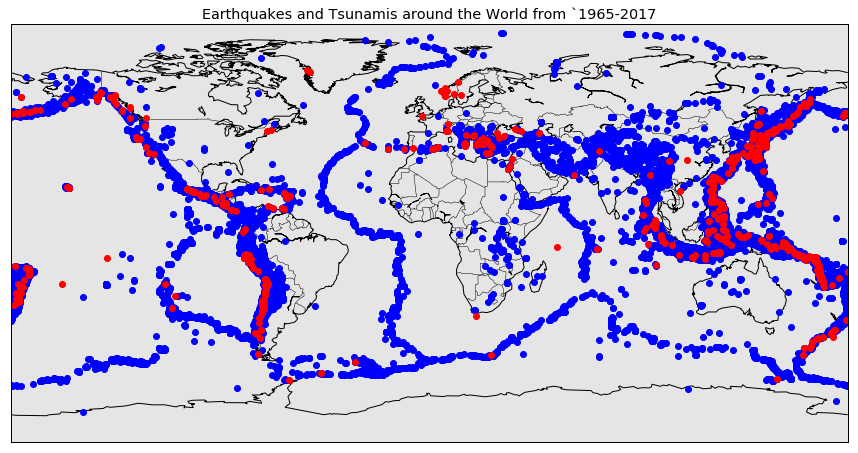

In [152]:
plt.title("Earthquakes and Tsunamis around the World from `1965-2017")
plt.show()

First, I converted all the observations for longitude and latitude in both sets from strings to floats. Then I plotted a map and all the known points for the earthquakes dataset and all the known points for the tsunami datasets. It seems that a lot of the points both overlap somewhere in the North American region and in the East Asian region and in the area known as the Ring of Fire where a large number of earthquakes and volcanic activity occur. It also looks like more tsunamis have occured in the Europe region rather than earthquakes.

In [79]:
dates = earthquakes[['Date']].values.tolist()
years = []
months = []
days = []
for i in range(0, len(dates)):
    dates[i] = dates[i][0].split("/")
    try:
        years.append(dates[i][2])
    except IndexError:
        years.append('NaN')
    try:
        months.append(dates[i][0])
    except IndexError:
        months.append('NaN')
    try:
        days.append(dates[i][1])
    except IndexError:
        days.append('NaN')

In [80]:
idlist = []
for i in range(0, len(earthquakes.index)):
    idlist.append(i)

In [81]:
earthquakes['Year'] = years
earthquakes['Month'] = months
earthquakes['Days'] = days
earthquakes['ID'] = idlist

In [82]:
earthquakes.head()

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
0,1/2/1965,13:44:18,19.246,145.616,6.0,131.6,1965,1,2,0
1,1/4/1965,11:29:49,1.863,127.352,5.8,80.0,1965,1,4,1
2,1/5/1965,18:05:58,-20.579,-173.972,6.2,20.0,1965,1,5,2
3,1/8/1965,18:49:43,-59.076,-23.557,5.8,15.0,1965,1,8,3
4,1/9/1965,13:32:50,11.938,126.427,5.8,15.0,1965,1,9,4


I split the dates into days, months, and years and added those rows to the dataset so I can analyze the dataset more flexibly. I also added IDs to each observation in order to remember specific ones.

I am interested in seeing how many earthquakes cause tsunamis in each year and their magnitude so I will pick two random years and analyze the earthquakes and tsunamis in those years.

In [83]:
eq2012 = earthquakes.loc[(earthquakes['Year'] == '2012')]
tsu2012 = tsu.loc[tsu[u'YEAR'] == 2012]

In [84]:
tsu2012

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
2515,5442,2012,2.0,2.0,13.0,34.0,40.6,4.0,1.0,23.0,7.0,VANUATU,NaN,VANUATU ISLANDS,-17.827,167.133
2516,5446,2012,3.0,14.0,9.0,8.0,35.1,4.0,1.0,12.0,6.9,JAPAN,NaN,HOKKAIDO ISLAND,40.887,144.944
2517,5447,2012,3.0,20.0,18.0,2.0,47.4,4.0,1.0,20.0,7.4,MEXICO,NaN,S. MEXICO,16.493,-98.231
2518,5449,2012,4.0,11.0,8.0,38.0,36.7,4.0,1.0,20.0,8.6,INDONESIA,NaN,OFF W. COAST OF N SUMATRA,2.327,93.063
2519,5450,2012,4.0,11.0,10.0,43.0,10.8,4.0,1.0,25.0,8.2,INDONESIA,NaN,OFF W. COAST OF N SUMATRA,0.802,92.463
2520,5451,2012,4.0,14.0,22.0,5.0,26.4,4.0,1.0,11.0,6.3,VANUATU,NaN,VANUATU ISLANDS,-18.972,168.741
2521,5460,2012,7.0,15.0,NaN,NaN,NaN,4.0,8.0,NaN,NaN,GREENLAND,NaN,ILULISSAT ICEFJORD,69.200,-51.300
2522,5462,2012,8.0,27.0,4.0,37.0,19.4,4.0,1.0,28.0,7.3,NICARAGUA,NaN,OFF THE COAST,12.139,-88.590
2523,5463,2012,8.0,31.0,12.0,47.0,33.3,4.0,1.0,28.0,7.6,PHILIPPINES,NaN,PHILIPPINE ISLANDS,10.811,126.638
2524,5464,2012,9.0,5.0,14.0,42.0,7.8,4.0,1.0,35.0,7.6,COSTA RICA,NaN,COSTA RICA,10.085,-85.315


In [168]:
print len(tsu2012), len(eq2012)

14 445


In the year 2012, it looks like there is 1 tsunami that occured in February, 2 in March, 3 in April, 1 in July, 2 in August, 1 in September, 1 in October, 1 in Novemer, and 2 in December with a total of 14 tsunamis. There are 445 earthquakes total in the year 2012.

In [87]:
tsu2012.loc[tsu2012[u'MONTH'] == 2]

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
2515,5442,2012,2.0,2.0,13.0,34.0,40.6,4.0,1.0,23.0,7.0,VANUATU,NaN,VANUATU ISLANDS,-17.827,167.133


In [86]:
eq2012.loc[(eq2012['Month'] == '2') & (eq2012['Days'] == '2')]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
21142,2/2/2012,6:46:30,-6.563,149.774,5.6,51.3,2012,2,2,21142
21143,2/2/2012,9:32:17,-6.586,149.718,5.6,38.6,2012,2,2,21143
21144,2/2/2012,13:34:41,-17.827,167.133,7.1,23.0,2012,2,2,21144
21145,2/2/2012,17:27:07,-17.954,167.179,5.5,20.6,2012,2,2,21145


I will look at the time, longitude, and latitude of the observations in the earthquakes and if any matches the tsunami values, then it is assumed that that specific earthquake caused the tsunami. The earthquake observation that matches this tsunami observation is the third observation in the earthquakes that happened in February 2012.

In [89]:
earthquakes.loc[earthquakes['ID'] == 21144]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
21144,2/2/2012,13:34:41,-17.827,167.133,7.1,23.0,2012,2,2,21144


Now I will do the same for March and the rest of the months

In [90]:
tsu2012.loc[tsu2012[u'MONTH'] == 3]

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
2516,5446,2012,3.0,14.0,9.0,8.0,35.1,4.0,1.0,12.0,6.9,JAPAN,NaN,HOKKAIDO ISLAND,40.887,144.944
2517,5447,2012,3.0,20.0,18.0,2.0,47.4,4.0,1.0,20.0,7.4,MEXICO,NaN,S. MEXICO,16.493,-98.231


In [110]:
eq2012.loc[(eq2012['Month'] == '3') & ((eq2012['Days'] == '14') | (eq2012['Days'] == '20'))]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
21192,3/14/2012,9:08:35,40.887,144.944,6.9,12.0,2012,3,14,21192
21193,3/14/2012,10:49:25,40.781,144.761,6.1,10.0,2012,3,14,21193
21194,3/14/2012,10:57:40,40.755,144.806,5.6,12.0,2012,3,14,21194
21195,3/14/2012,12:05:05,35.687,140.695,6.0,10.0,2012,3,14,21195
21196,3/14/2012,21:13:08,-5.595,151.042,6.2,28.0,2012,3,14,21196
21202,3/20/2012,17:56:19,-3.812,140.266,6.1,66.0,2012,3,20,21202
21203,3/20/2012,18:02:47,16.493,-98.231,7.4,20.0,2012,3,20,21203


In [113]:
earthquakes.loc[(earthquakes['ID'] == 21192) | (earthquakes['ID'] == 21203)]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
21192,3/14/2012,9:08:35,40.887,144.944,6.9,12.0,2012,3,14,21192
21203,3/20/2012,18:02:47,16.493,-98.231,7.4,20.0,2012,3,20,21203


In [114]:
tsu2012.loc[tsu2012[u'MONTH'] == 4]

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
2518,5449,2012,4.0,11.0,8.0,38.0,36.7,4.0,1.0,20.0,8.6,INDONESIA,NaN,OFF W. COAST OF N SUMATRA,2.327,93.063
2519,5450,2012,4.0,11.0,10.0,43.0,10.8,4.0,1.0,25.0,8.2,INDONESIA,NaN,OFF W. COAST OF N SUMATRA,0.802,92.463
2520,5451,2012,4.0,14.0,22.0,5.0,26.4,4.0,1.0,11.0,6.3,VANUATU,NaN,VANUATU ISLANDS,-18.972,168.741


In [115]:
eq2012.loc[(eq2012['Month'] == '4') & ((eq2012['Days'] == '11') | (eq2012['Days'] == '14'))]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
21219,4/11/2012,8:38:37,2.327,93.063,8.6,20.0,2012,4,11,21219
21220,4/11/2012,8:55:47,1.271,91.748,5.8,10.0,2012,4,11,21220
21221,4/11/2012,9:00:10,51.364,-176.097,5.5,20.8,2012,4,11,21221
21222,4/11/2012,9:01:07,2.199,89.441,5.9,10.0,2012,4,11,21222
21223,4/11/2012,9:27:57,1.254,91.735,6.0,10.0,2012,4,11,21223
21224,4/11/2012,10:43:11,0.802,92.463,8.2,25.1,2012,4,11,21224
21225,4/11/2012,11:53:36,2.913,89.544,5.7,10.0,2012,4,11,21225
21226,4/11/2012,13:58:05,1.495,90.854,5.5,5.0,2012,4,11,21226
21227,4/11/2012,19:04:20,1.190,92.092,5.5,14.5,2012,4,11,21227
21228,4/11/2012,22:41:46,43.584,-127.638,6.0,8.0,2012,4,11,21228


In [116]:
earthquakes.loc[(earthquakes['ID'] == 21219) | (earthquakes['ID'] == 21224) | (earthquakes['ID'] == 21238)]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
21219,4/11/2012,8:38:37,2.327,93.063,8.6,20.0,2012,4,11,21219
21224,4/11/2012,10:43:11,0.802,92.463,8.2,25.1,2012,4,11,21224
21238,4/14/2012,22:05:26,-18.972,168.741,6.2,11.0,2012,4,14,21238


In [117]:
tsu2012.loc[tsu2012[u'MONTH'] == 7]

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
2521,5460,2012,7.0,15.0,NaN,NaN,NaN,4.0,8.0,NaN,NaN,GREENLAND,NaN,ILULISSAT ICEFJORD,69.2,-51.3


In [118]:
eq2012.loc[(eq2012['Month'] == '7') & (eq2012['Days'] == '15')]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID


In [119]:
tsu2012.loc[tsu2012[u'MONTH'] == 8]

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
2522,5462,2012,8.0,27.0,4.0,37.0,19.4,4.0,1.0,28.0,7.3,NICARAGUA,NaN,OFF THE COAST,12.139,-88.590
2523,5463,2012,8.0,31.0,12.0,47.0,33.3,4.0,1.0,28.0,7.6,PHILIPPINES,NaN,PHILIPPINE ISLANDS,10.811,126.638


In [120]:
eq2012.loc[(eq2012['Month'] == '8') & ((eq2012['Days'] == '27') | (eq2012['Days'] == '31'))]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
21405,8/27/2012,4:37:19,12.139,-88.590,7.3,28.0,2012,8,27,21405
21406,8/27/2012,5:38:04,12.297,-88.612,5.5,35.0,2012,8,27,21406
21411,8/31/2012,12:47:33,10.811,126.638,7.6,28.0,2012,8,31,21411
21412,8/31/2012,23:37:58,10.388,126.719,5.6,40.3,2012,8,31,21412


In [121]:
earthquakes.loc[(earthquakes['ID'] == 21405) | (earthquakes['ID'] == 21411)]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
21405,8/27/2012,4:37:19,12.139,-88.590,7.3,28.0,2012,8,27,21405
21411,8/31/2012,12:47:33,10.811,126.638,7.6,28.0,2012,8,31,21411


In [122]:
tsu2012.loc[tsu2012[u'MONTH'] == 9]

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
2524,5464,2012,9.0,5.0,14.0,42.0,7.8,4.0,1.0,35.0,7.6,COSTA RICA,NaN,COSTA RICA,10.085,-85.315


In [126]:
eq2012.loc[(eq2012['Month'] == '9') & (eq2012['Days'] == '5')]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
21417,9/5/2012,13:09:10,-12.476,166.513,6.0,27.0,2012,9,5,21417
21418,9/5/2012,14:42:08,10.085,-85.315,7.6,35.0,2012,9,5,21418


In [127]:
earthquakes.loc[(earthquakes['ID'] == 21418)]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
21418,9/5/2012,14:42:08,10.085,-85.315,7.6,35.0,2012,9,5,21418


In [123]:
tsu2012.loc[tsu2012[u'MONTH'] == 10]

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
2525,5467,2012,10.0,28.0,3.0,4.0,8.8,4.0,1.0,14.0,7.7,CANADA,BC,BRITISH COLUMBIA,52.788,-132.101


In [128]:
eq2012.loc[(eq2012['Month'] == '10') & (eq2012['Days'] == '28')]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
21477,10/28/2012,3:04:09,52.788,-132.101,7.8,14.0,2012,10,28,21477
21478,10/28/2012,3:52:20,52.576,-131.962,5.5,10.0,2012,10,28,21478
21479,10/28/2012,18:54:21,52.674,-132.602,6.3,9.0,2012,10,28,21479
21480,10/28/2012,19:09:54,52.294,-132.082,5.6,10.0,2012,10,28,21480


In [129]:
earthquakes.loc[(earthquakes['ID'] == 21477)]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
21477,10/28/2012,3:04:09,52.788,-132.101,7.8,14.0,2012,10,28,21477


In [124]:
tsu2012.loc[tsu2012[u'MONTH'] == 11]

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
2526,5468,2012,11.0,7.0,16.0,35.0,46.9,4.0,1.0,24.0,7.3,GUATEMALA,NaN,GUATEMALA,13.988,-91.895


In [130]:
eq2012.loc[(eq2012['Month'] == '11') & (eq2012['Days'] == '7')]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
21493,11/7/2012,16:35:47,13.988,-91.895,7.4,24.0,2012,11,7,21493
21494,11/7/2012,22:42:48,13.849,-92.156,5.7,35.0,2012,11,7,21494
21495,11/7/2012,23:42:19,-8.652,148.034,5.6,118.4,2012,11,7,21495


In [131]:
earthquakes.loc[(earthquakes['ID'] == 21493)]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
21493,11/7/2012,16:35:47,13.988,-91.895,7.4,24.0,2012,11,7,21493


In [125]:
tsu2012.loc[tsu2012[u'MONTH'] == 12]

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
2527,5469,2012,12.0,7.0,8.0,18.0,23.1,4.0,1.0,31.0,7.2,JAPAN,NaN,OFF EAST COAST OF HONSHU ISLAND,37.890,143.949
2528,5471,2012,12.0,28.0,NaN,NaN,NaN,0.0,8.0,NaN,NaN,CHINA,NaN,"ZHAOJUN BRIDGE, HUBEI PROVINCE",31.256,110.733


In [132]:
eq2012.loc[(eq2012['Month'] == '12') & ((eq2012['Days'] == '7') | (eq2012['Days'] == '28'))]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
21530,12/7/2012,8:18:23,37.890,143.949,7.3,31.0,2012,12,7,21530
21531,12/7/2012,8:31:15,37.914,143.764,6.2,32.0,2012,12,7,21531
21532,12/7/2012,8:48:13,37.828,143.607,5.5,20.2,2012,12,7,21532
21533,12/7/2012,18:19:06,-38.428,176.067,6.3,163.0,2012,12,7,21533
21534,12/7/2012,19:50:23,-7.661,146.954,5.7,139.8,2012,12,7,21534
21553,12/28/2012,17:32:18,-0.145,122.918,5.5,112.1,2012,12,28,21553


In [133]:
earthquakes.loc[(earthquakes['ID'] == 21530)]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
21530,12/7/2012,8:18:23,37.89,143.949,7.3,31.0,2012,12,7,21530


In [135]:
eqtsu2012 = earthquakes.loc[(earthquakes['ID'] == 21144) | (earthquakes['ID'] == 21192) | (earthquakes['ID'] == 21203) | 
                (earthquakes['ID'] == 21405) | (earthquakes['ID'] == 21219) | (earthquakes['ID'] == 21224) | 
                (earthquakes['ID'] == 21238) | (earthquakes['ID'] == 21405) | (earthquakes['ID'] == 21411) | 
                (earthquakes['ID'] == 21418) | (earthquakes['ID'] == 21477) | (earthquakes['ID'] == 21493) | 
                (earthquakes['ID'] == 21530)]

In [136]:
eqtsu2012

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
21144,2/2/2012,13:34:41,-17.827,167.133,7.1,23.0,2012,2,2,21144
21192,3/14/2012,9:08:35,40.887,144.944,6.9,12.0,2012,3,14,21192
21203,3/20/2012,18:02:47,16.493,-98.231,7.4,20.0,2012,3,20,21203
21219,4/11/2012,8:38:37,2.327,93.063,8.6,20.0,2012,4,11,21219
21224,4/11/2012,10:43:11,0.802,92.463,8.2,25.1,2012,4,11,21224
21238,4/14/2012,22:05:26,-18.972,168.741,6.2,11.0,2012,4,14,21238
21405,8/27/2012,4:37:19,12.139,-88.590,7.3,28.0,2012,8,27,21405
21411,8/31/2012,12:47:33,10.811,126.638,7.6,28.0,2012,8,31,21411
21418,9/5/2012,14:42:08,10.085,-85.315,7.6,35.0,2012,9,5,21418
21477,10/28/2012,3:04:09,52.788,-132.101,7.8,14.0,2012,10,28,21477


In [138]:
print float(len(eqtsu2012))/float(len(tsu2012)), float(len(eqtsu2012))/float(len(eq2012))

0.857142857143 0.0269662921348


About 86% of the tsunamis in 2012 were caused by earthquakes and about 2.7% of earthquakes in 2012 cause tsunamis.

In [146]:
plt.figure(figsize=(15,10))
displaymap2012 = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90)
displaymap2012.drawmapboundary()
displaymap2012.drawcountries()
displaymap2012.drawcoastlines()
longitude2012 = eqtsu2012[['Longitude']].values.tolist()
for i in range(0, len(longitude2012)):
    longitude2012[i] = float(longitude2012[i][0])
latitude2012 = eqtsu2012[['Latitude']].values.tolist()
for i in range(0, len(latitude2012)):
    latitude2012[i] = float(latitude2012[i][0])
lons2012,lats2012 = displaymap(longitude2012, latitude2012)
displaymap2012.plot(lons2012, lats2012, 'bo', color = "blue")

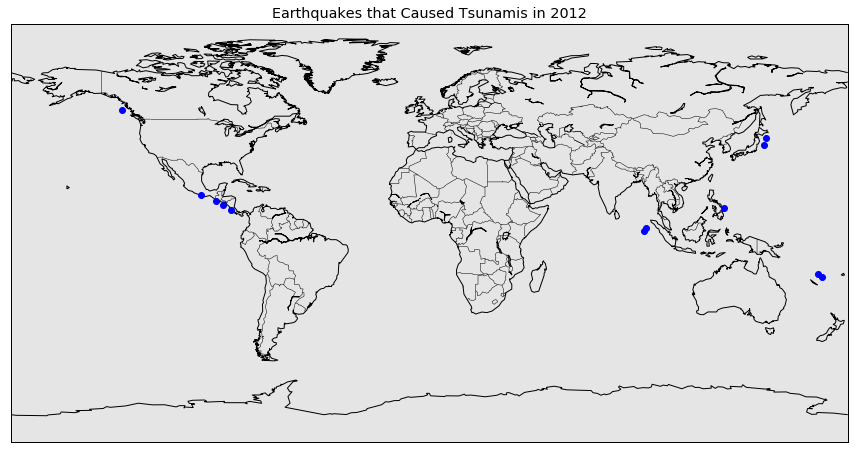

In [147]:
plt.title("Earthquakes that Caused Tsunamis in 2012")
plt.show()

From the world map, all the earthquakes that caused the tsunamis were from areas near bodies of water.

In [144]:
min2012 = eqtsu2012['Magnitude'].min()
max2012 = eqtsu2012['Magnitude'].max()
print min2012, max2012

6.2 8.6


The magnitudes of earthquakes that caused tsunamis in 2012 ranges from 6.2 to 8.6

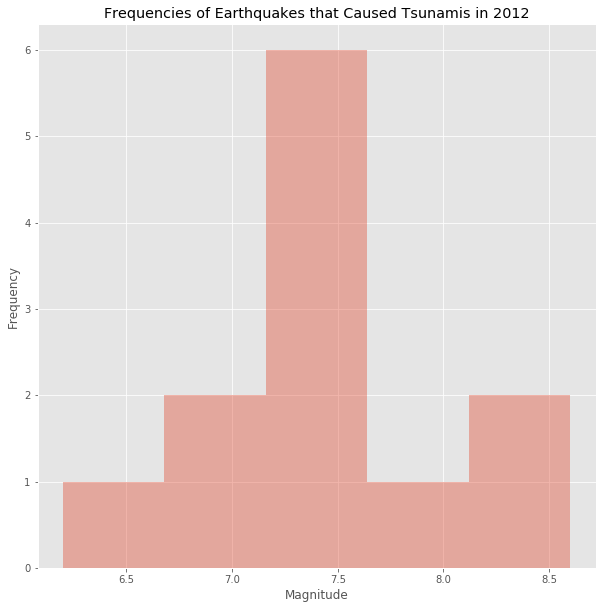

In [158]:
plt.figure(figsize=(10,10))
plt.hist(eqtsu2012['Magnitude'], bins = 5, alpha = 0.4)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title("Frequencies of Earthquakes that Caused Tsunamis in 2012")
plt.show()

From the histogram, most of the earthquakes that caused tsunamis lies between the range of 7 to 7.5 degrees of magnitude.

Now I pick another year, 1997 to see how much and what degree magnitudes of earthquakes cause tsunamis and see if the results are similar or consistent with the year 2012.

In [178]:
eq1997 = earthquakes.loc[(earthquakes['Year'] == '1997')]
tsu1997 = tsu.loc[tsu[u'YEAR'] == 1997]

In [179]:
tsu1997

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
2362,5416,1997,4.0,10.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,HONDURAS,NaN,GULF OF FONSECA,13.100,-87.600
2364,2273,1997,4.0,21.0,12.0,2.0,26.4,4.0,1.0,33.0,7.7,SOLOMON ISLANDS,NaN,SANTA CRUZ IS. VANUATU,-12.584,166.676
2365,2274,1997,7.0,9.0,19.0,24.0,13.1,3.0,1.0,20.0,7.0,VENEZUELA,NaN,CARIACO-CUMANA,10.598,-63.486
2366,3034,1997,9.0,30.0,6.0,27.0,24.7,4.0,1.0,10.0,6.2,JAPAN,NaN,S. OF HONSHU ISLAND,31.959,141.878
2367,2275,1997,10.0,14.0,9.0,53.0,18.1,4.0,1.0,167.0,7.7,TONGA,NaN,TONGA ISLANDS,-22.100,-176.770
2368,2277,1997,12.0,5.0,11.0,26.0,54.6,4.0,1.0,33.0,7.8,RUSSIA,NaN,KAMCHATKA,54.841,162.035
2369,2278,1997,12.0,14.0,3.0,30.0,NaN,3.0,8.0,NaN,NaN,RUSSIA,NaN,KAMCHATKA,54.841,162.035
2370,2279,1997,12.0,26.0,8.0,NaN,NaN,4.0,7.0,NaN,NaN,MONTSERRAT,NaN,WHITE RIVER VALLEY,16.720,-62.180


In [180]:
print len(tsu1997.index), len(eq1997.index)

8 456


In the year 1997, it looks like there are 2 tsunamis in April, 1 in July, 1 in September, 1 in October, and 3 in December with a total of 8 tsunamis. There are 456 earthquakes total in the year 1997.

In [181]:
tsu1997.loc[tsu1997[u'MONTH'] == 4]

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
2362,5416,1997,4.0,10.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,HONDURAS,NaN,GULF OF FONSECA,13.100,-87.600
2364,2273,1997,4.0,21.0,12.0,2.0,26.4,4.0,1.0,33.0,7.7,SOLOMON ISLANDS,NaN,SANTA CRUZ IS. VANUATU,-12.584,166.676


In [182]:
eq1997.loc[(eq1997['Month'] == '4') & ((eq1997['Days'] == '10') | (eq1997['Days'] == '21'))]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
13495,4/21/1997,2:42:45,-0.149,124.073,5.5,50.0,1997,4,21,13495
13496,4/21/1997,12:02:26,-12.584,166.676,7.7,33.0,1997,4,21,13496
13497,4/21/1997,12:06:34,-12.881,166.464,6.1,33.0,1997,4,21,13497
13498,4/21/1997,12:11:28,-13.500,166.541,6.2,33.0,1997,4,21,13498
13499,4/21/1997,12:15:57,-13.406,166.344,6.0,33.0,1997,4,21,13499
13500,4/21/1997,12:20:50,-13.602,166.832,5.7,33.0,1997,4,21,13500
13501,4/21/1997,12:23:46,-13.673,166.455,5.5,33.0,1997,4,21,13501
13502,4/21/1997,12:28:28,-13.541,166.426,5.5,33.0,1997,4,21,13502
13503,4/21/1997,14:01:24,-7.382,125.715,5.9,432.3,1997,4,21,13503
13504,4/21/1997,21:23:54,-13.158,166.522,5.5,33.0,1997,4,21,13504


In [186]:
eq1997.loc[(eq1997['ID'] == 13496)]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
13496,4/21/1997,12:02:26,-12.584,166.676,7.7,33.0,1997,4,21,13496


In [187]:
tsu1997.loc[tsu1997[u'MONTH'] == 7]

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
2365,2274,1997,7.0,9.0,19.0,24.0,13.1,3.0,1.0,20.0,7.0,VENEZUELA,NaN,CARIACO-CUMANA,10.598,-63.486


In [188]:
eq1997.loc[(eq1997['Month'] == '7') & (eq1997['Days'] == '9')]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
13600,7/9/1997,19:24:13,10.598,-63.486,7.0,19.9,1997,7,9,13600


In [190]:
eq1997.loc[(eq1997['ID'] == 13600)]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
13600,7/9/1997,19:24:13,10.598,-63.486,7.0,19.9,1997,7,9,13600


In [189]:
tsu1997.loc[tsu1997[u'MONTH'] == 9]

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
2366,3034,1997,9.0,30.0,6.0,27.0,24.7,4.0,1.0,10.0,6.2,JAPAN,NaN,S. OF HONSHU ISLAND,31.959,141.878


In [191]:
eq1997.loc[(eq1997['Month'] == '9') & (eq1997['Days'] == '30')]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
13688,9/30/1997,6:27:25,31.959,141.878,6.2,10.0,1997,9,30,13688


In [192]:
eq1997.loc[(eq1997['ID'] == 13688)]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
13688,9/30/1997,6:27:25,31.959,141.878,6.2,10.0,1997,9,30,13688


In [193]:
tsu1997.loc[tsu1997[u'MONTH'] == 10]

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
2367,2275,1997,10.0,14.0,9.0,53.0,18.1,4.0,1.0,167.0,7.7,TONGA,NaN,TONGA ISLANDS,-22.1,-176.77


In [194]:
eq1997.loc[(eq1997['Month'] == '10') & (eq1997['Days'] == '14')]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
13711,10/14/1997,9:53:18,-22.101,-176.772,7.8,167.3,1997,10,14,13711
13712,10/14/1997,15:23:10,42.962,12.892,5.5,10.0,1997,10,14,13712


In [195]:
eq1997.loc[(eq1997['ID'] == 13711)]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
13711,10/14/1997,9:53:18,-22.101,-176.772,7.8,167.3,1997,10,14,13711


In [196]:
tsu1997.loc[tsu1997[u'MONTH'] == 12]

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENT_VALIDITY,CAUSE_CODE,FOCAL_DEPTH,PRIMARY_MAGNITUDE,COUNTRY,STATE,LOCATION_NAME,LATITUDE,LONGITUDE
2368,2277,1997,12.0,5.0,11.0,26.0,54.6,4.0,1.0,33.0,7.8,RUSSIA,NaN,KAMCHATKA,54.841,162.035
2369,2278,1997,12.0,14.0,3.0,30.0,NaN,3.0,8.0,NaN,NaN,RUSSIA,NaN,KAMCHATKA,54.841,162.035
2370,2279,1997,12.0,26.0,8.0,NaN,NaN,4.0,7.0,NaN,NaN,MONTSERRAT,NaN,WHITE RIVER VALLEY,16.720,-62.180


In [198]:
eq1997.loc[(eq1997['Month'] == '12') & ((eq1997['Days'] == '5') | (eq1997['Days'] == '14') | (eq1997['Days'] == '26'))]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
13784,12/5/1997,8:08:50,55.281,162.444,5.5,33.0,1997,12,5,13784
13785,12/5/1997,11:26:55,54.841,162.035,7.8,33.0,1997,12,5,13785
13786,12/5/1997,11:35:20,53.909,161.550,5.7,33.0,1997,12,5,13786
13787,12/5/1997,11:37:09,54.512,162.318,5.6,33.0,1997,12,5,13787
13788,12/5/1997,13:56:12,0.656,125.114,5.5,89.4,1997,12,5,13788
13789,12/5/1997,18:48:23,53.752,161.746,6.4,33.0,1997,12,5,13789
13790,12/5/1997,19:04:07,53.792,161.596,5.5,33.0,1997,12,5,13790
13806,12/14/1997,2:39:17,-59.574,-26.186,5.7,33.0,1997,12,14,13806
13807,12/14/1997,8:48:36,-3.081,136.106,5.6,33.0,1997,12,14,13807
13808,12/14/1997,23:10:04,-15.571,-173.173,5.6,33.0,1997,12,14,13808


In [199]:
eq1997.loc[(eq1997['ID'] == 13785)]

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
13785,12/5/1997,11:26:55,54.841,162.035,7.8,33.0,1997,12,5,13785


In [200]:
eqtsu1997 = earthquakes.loc[(earthquakes['ID'] == 13469) | (earthquakes['ID'] == 13600) | (earthquakes['ID'] == 13688) | 
                (earthquakes['ID'] == 13711) | (earthquakes['ID'] == 23785)]

In [201]:
eqtsu1997

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
13469,4/2/1997,19:33:22,31.824,130.089,5.5,10.0,1997,4,2,13469
13600,7/9/1997,19:24:13,10.598,-63.486,7.0,19.9,1997,7,9,13600
13688,9/30/1997,6:27:25,31.959,141.878,6.2,10.0,1997,9,30,13688
13711,10/14/1997,9:53:18,-22.101,-176.772,7.8,167.3,1997,10,14,13711


In [202]:
print float(len(eqtsu1997))/float(len(tsu1997)), float(len(eqtsu1997))/float(len(eq1997))

0.5 0.00877192982456


About 50% of tsunamis were caused by earthquakes in 1997 and about 1% of earthquakes that year caused tsunamis.

In [203]:
plt.figure(figsize=(15,10))
displaymap1997 = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90)
displaymap1997.drawmapboundary()
displaymap1997.drawcountries()
displaymap1997.drawcoastlines()
longitude1997 = eqtsu1997[['Longitude']].values.tolist()
for i in range(0, len(longitude1997)):
    longitude1997[i] = float(longitude1997[i][0])
latitude1997 = eqtsu1997[['Latitude']].values.tolist()
for i in range(0, len(latitude1997)):
    latitude1997[i] = float(latitude1997[i][0])
lons1997,lats1997 = displaymap(longitude1997, latitude1997)
displaymap1997.plot(lons1997, lats1997, 'bo', color = "blue")

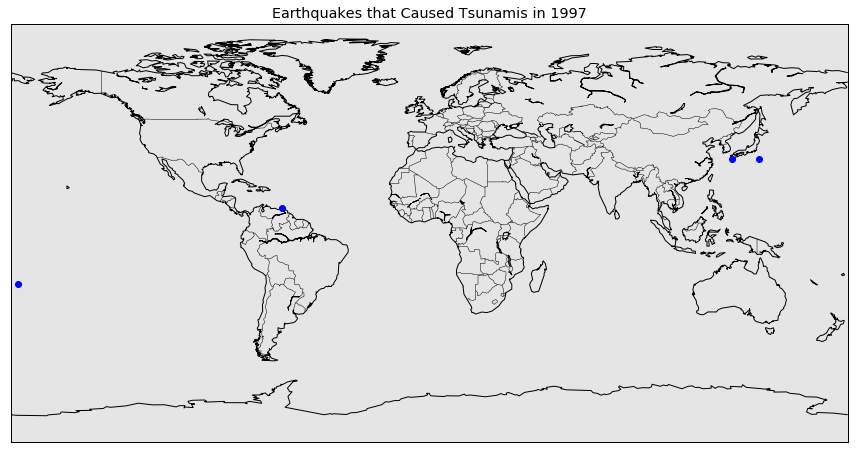

In [204]:
plt.title("Earthquakes that Caused Tsunamis in 1997")
plt.show()

Again, all the earthquakes that caused tsunamis happened near or in bodies of water so it's consistent with the observation from the world map for 2012. I will not provide a histogram for this year as there are only 4 earthquakes that caused tsunamis this year.

In [205]:
min1997 = eqtsu1997['Magnitude'].min()
max1997 = eqtsu1997['Magnitude'].max()
print min1997, max1997

5.5 7.8


The range of earthquakes that caused tsunamis for 1997 is between 5.5 and 7.8.

Now I want to combine the datasets of earthquakes that cause tsunamis I have gotten in the previous parts to see how that fits in with the observations I have obtained so far.

In [206]:
eqcom = earthquakes.loc[(earthquakes['Year'] == '1997') | (earthquakes['Year'] == '2012')]
tsucom = tsu.loc[(tsu[u'YEAR'] == 1997) | (tsu[u'YEAR'] == 2012)]
frames = [eqtsu1997, eqtsu2012]
eqtsucom = pd.concat(frames)

In [207]:
eqtsucom

,Date,Time,Latitude,Longitude,Magnitude,Depth,Year,Month,Days,ID
13469,4/2/1997,19:33:22,31.824,130.089,5.5,10.0,1997,4,2,13469
13600,7/9/1997,19:24:13,10.598,-63.486,7.0,19.9,1997,7,9,13600
13688,9/30/1997,6:27:25,31.959,141.878,6.2,10.0,1997,9,30,13688
13711,10/14/1997,9:53:18,-22.101,-176.772,7.8,167.3,1997,10,14,13711
21144,2/2/2012,13:34:41,-17.827,167.133,7.1,23.0,2012,2,2,21144
21192,3/14/2012,9:08:35,40.887,144.944,6.9,12.0,2012,3,14,21192
21203,3/20/2012,18:02:47,16.493,-98.231,7.4,20.0,2012,3,20,21203
21219,4/11/2012,8:38:37,2.327,93.063,8.6,20.0,2012,4,11,21219
21224,4/11/2012,10:43:11,0.802,92.463,8.2,25.1,2012,4,11,21224
21238,4/14/2012,22:05:26,-18.972,168.741,6.2,11.0,2012,4,14,21238


In [208]:
print float(len(eqtsucom))/float(len(tsucom)), float(len(eqtsucom))/float(len(eqcom))

0.727272727273 0.0177580466149


When averaged, approximately 72% of tsunamis are caused by earthquakes and about 2% of those earthquakes cause tsunamis.

In [209]:
plt.figure(figsize=(15,10))
displaymapcom = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90)
displaymapcom.drawmapboundary()
displaymapcom.drawcountries()
displaymapcom.drawcoastlines()
longitudecom = eqtsucom[['Longitude']].values.tolist()
for i in range(0, len(longitudecom)):
    longitudecom[i] = float(longitudecom[i][0])
latitudecom = eqtsucom[['Latitude']].values.tolist()
for i in range(0, len(latitudecom)):
    latitudecom[i] = float(latitudecom[i][0])
lonscom,latscom = displaymap(longitudecom, latitudecom)
displaymapcom.plot(lonscom, latscom, 'bo', color = "blue")

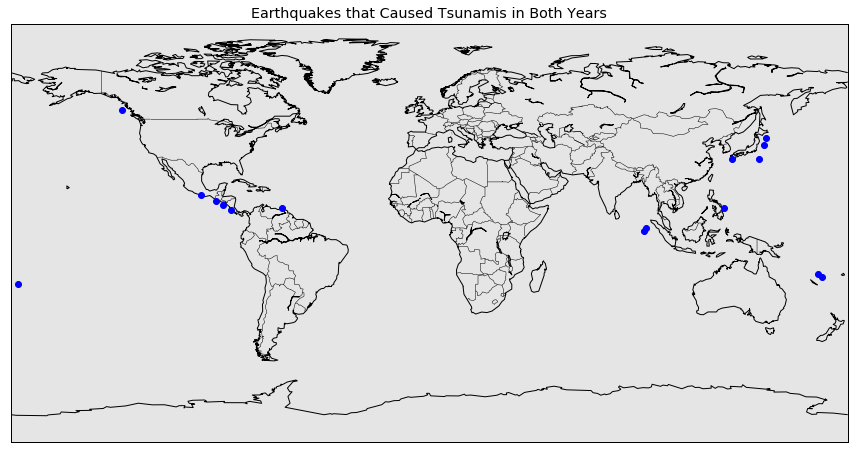

In [210]:
plt.title("Earthquakes that Caused Tsunamis in Both Years")
plt.show()

All the earthquakes that cause tsunamis are located near or in bodies of water. This has been a consistent observation so far.

In [211]:
mincom = eqtsucom['Magnitude'].min()
maxcom = eqtsucom['Magnitude'].max()
print mincom, maxcom

5.5 8.6


The range of earthquakes that cause earthquakes for this set of observations is between 5.5 o 8.6 degrees of magnitude.

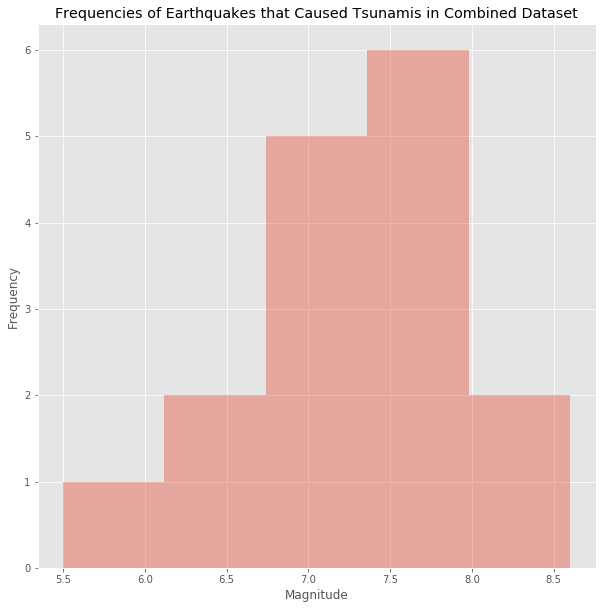

In [212]:
plt.figure(figsize=(10,10))
plt.hist(eqtsucom['Magnitude'], bins = 5, alpha = 0.4)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title("Frequencies of Earthquakes that Caused Tsunamis in Combined Dataset")
plt.show()

In the histogram, it is shown that a majority of tsunamis are caused by earthquakes between 7 to 8 degrees of magnitude which is consistent with the observation I obtained in the 2012 dataset.

## Conclusion
In conclusion, most tsunamis are caused by earthquakes located near or in bodies of water on the world map but about less than 5% of earthquakes in the world actually cause tsunamis itself. I have found that the majority of earthquakes that cause tsunamis have a magnitude between 5 and 9 which are the big earthquakes. The samples I have taken are not representative of the whole dataset because the dataset could not be merged together but I believe that the results would be more accurate if there is more data that had been analyzed and if there is a larger sample for the data.